In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


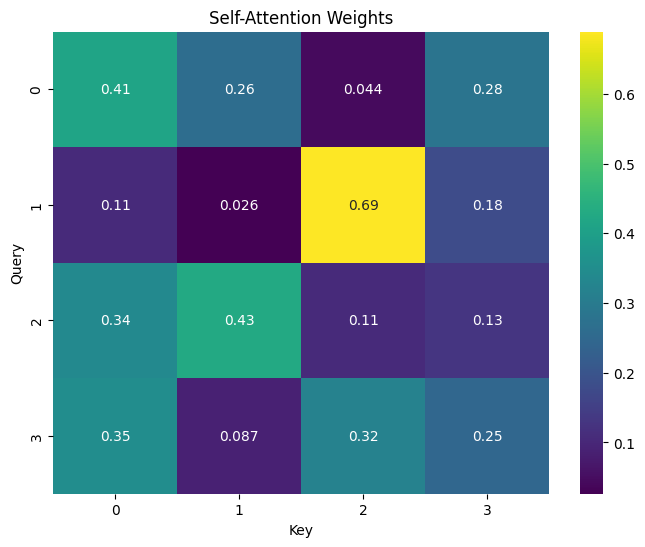

In [ ]:
# Simple self-attention implementation for demonstration
def self_attention(query, key, value):
    # Calculate attention scores
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / np.sqrt(d_k)
    attention_weights = torch.nn.functional.softmax(scores, dim=-1)

    # Apply attention to values
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

# Example with toy data
sequence_length = 4
d_k = 8

# Create random Q, K, V vectors
query = torch.randn(1, sequence_length, d_k)
key = torch.randn(1, sequence_length, d_k)
value = torch.randn(1, sequence_length, d_k)

# Compute self-attention
output, attention = self_attention(query, key, value)

# Visualize attention weights
plt.figure(figsize=(8, 6))
sns.heatmap(attention[0].detach().numpy(), annot=True, cmap='viridis')
plt.title('Self-Attention Weights')
plt.xlabel('Key')
plt.ylabel('Query')
plt.show()

In [ ]:
import os
os.environ['HF_HUB_DISABLE_TELEMETRY'] = '1'

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model = model.to(device)

# Load and prepare IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Convert indices back to words and create text
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

def sequence_to_text(sequence):
    return ' '.join([index_word.get(i - 3, '') for i in sequence])

# Convert some examples to text
train_texts = [sequence_to_text(seq) for seq in X_train[:1000]]  # Using subset for demo
train_labels = y_train[:1000]

# Tokenize texts
encoded = tokenizer(train_texts,
                    truncation=True,
                    padding=True,
                    max_length=128,
                    return_tensors='pt')

# Create dataset
train_dataset = TensorDataset(
    encoded['input_ids'],
    encoded['attention_mask'],
    torch.tensor(train_labels)
)

# Create dataloader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

print("Data preparation complete. Sample sizes:")
print(f"Train texts: {len(train_texts)}")
print(f"Max sequence length: {encoded['input_ids'].shape[1]}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Data preparation complete. Sample sizes:
Train texts: 1000
Max sequence length: 128
